In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import fit_library as fit_lib
import fit_library_n as fit_lib_n
import pandas as pd
%matplotlib nbagg
%reload_ext autoreload
%autoreload 2

In [2]:
# DATA
TH_HIGH = 1.414
TH_LOW = 0.404
Cint = 6.18E-12
GATE = 500E-9
pQ = 1E-12
#Ileak = 3.52E-6  # Computed from an empty input flip (dV*Cint/GATE)
Ileak = 3.5E-6 # Histogram fitted

Qu = (TH_HIGH-TH_LOW)*Cint / pQ

/tmp/ipykernel_12513/4203133653.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykern

/tmp/ipykernel_12513/4203133653.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykern

/tmp/ipykernel_12513/4203133653.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykern

/tmp/ipykernel_12513/4203133653.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/4203133653.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/4203133653.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykern

<IPython.core.display.Javascript object>


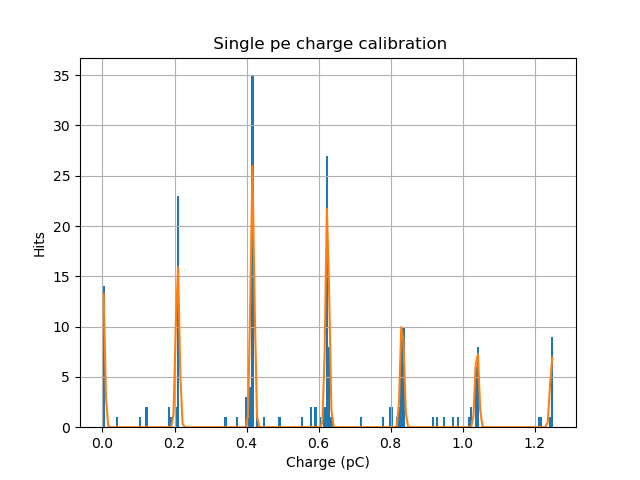

(200,)
(200,)
`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 1.1931e+03, final cost 3.0402e+02, first-order optimality 4.99e+00.
pe Value in pC =  0.208
pe Value in mV =  33.65695792880259
pe Value in LSB(aprox) =  17.232362459546927


In [3]:
df = pd.DataFrame(columns=['pe_density','Q_true','Q_measured','Qu','N_flips','Q_residue'])

pe_density = ["1pe"]

for pe in pe_density:
        if (pe == "200pe"):
            n_pe = 4000
        if (pe == "100pe"):
            n_pe = 2000
        if (pe == "50pe"):
            n_pe = 1000
        if (pe == "25pe"):
            n_pe = 500
        #n_pe = 750
        if (pe == "1pe"):
            n_pe = 6
        
        for set_d in range(1,201):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/few_pe/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t]})
            df = df.append(aux_pd, ignore_index=True)

df['Q_measured'].hist(bins=200)
y,x = np.histogram(df['Q_measured'],bins=200)
x = (x[:-1] + x[1:])/2
print(np.shape(y))
print(np.shape(x))

fit = fit_lib_n.gaussn_least(x,y,7)
param =    [0, 0.208,  10 ,15 ,15 ,25 ,12 ,12, 10 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01]
bounds = ([-1, 0.1,  0, 0, 0, 0, 0, 0, 0 ,0.005,0.005,0.005,0.005,0.005,0.005,0.005],
          [ 1, 0.4, 50,50,50,50,50,50,50 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ])
out_param,perr = fit(bounds,*param)
#plt.figure()
#plt.plot(x,y)
plt.plot(x,fit.evaluate())
plt.xlabel("Charge (pC)")
plt.ylabel("Hits")
plt.title(" Single pe charge calibration")

print("pe Value in pC = ",param[1])
print("pe Value in mV = ",param[1]*1E-12/(Cint)*1000)
print("pe Value in LSB(aprox) = ",param[1]*1E-12/(Cint)*1000/(1000/(2**9)))

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

Resolution 25pe = 0.781%
Accuracy 25pe = -0.653 (-0.624%)
Number of flips (mean) =  15.02


Resolution 50pe = 0.764%
Accuracy 50pe = -0.272 (-0.131%)
Number of flips (mean) =  27.21


Resolution 100pe = 0.675%
Accuracy 100pe = 0.656 (0.158%)
Number of flips (mean) =  61.6


Resolution 200pe = 0.177%
Accuracy 200pe = 8.175 (0.993%)
Number of flips (mean) =  127.06


/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3016335815.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

<IPython.core.display.Javascript object>


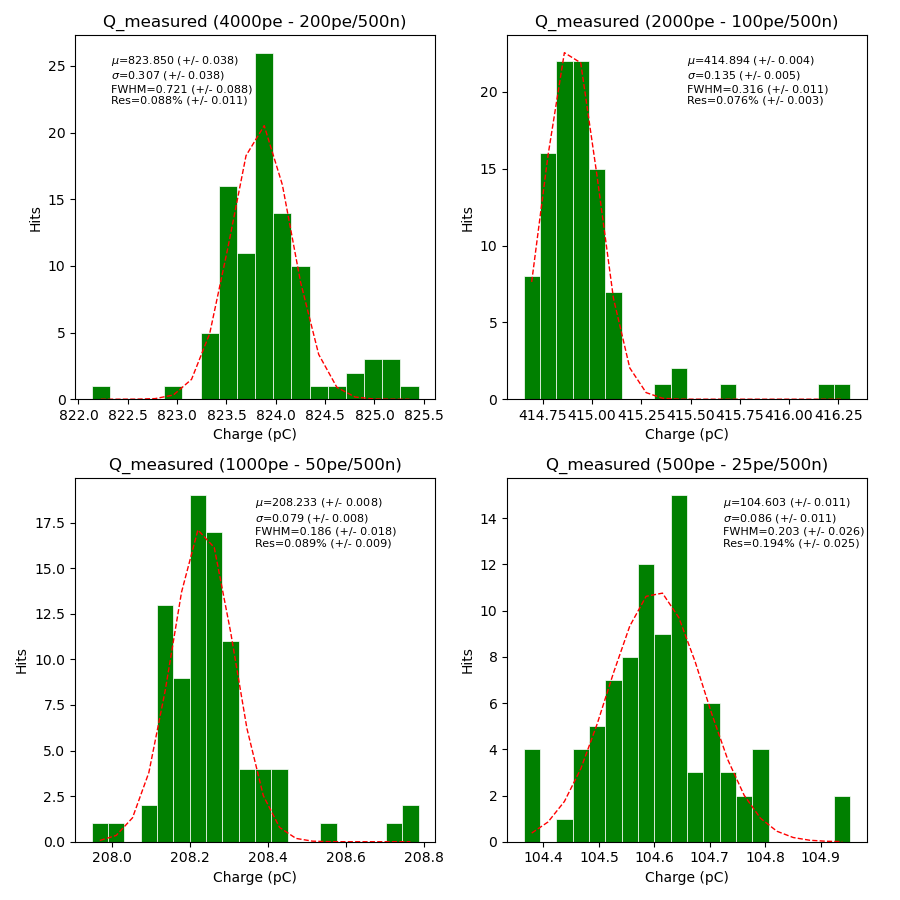

<IPython.core.display.Javascript object>


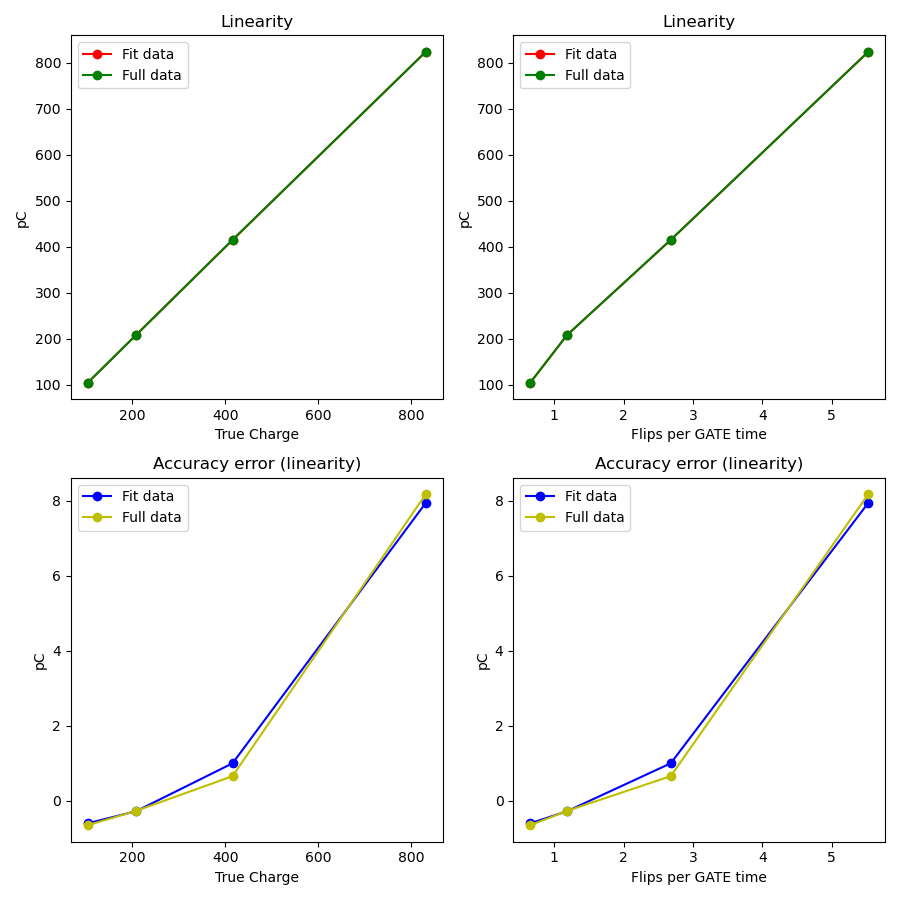

In [6]:
#pe_density = ["200pe"]
df = pd.DataFrame(columns=['pe_density','Q_true','Q_measured','Qu','N_flips','Q_residue'])

pe_density = ["200pe","100pe","50pe","25pe"]
#pe_density = ["1pe"]

for pe in pe_density:
        if (pe == "200pe"):
            n_pe = 4000
        if (pe == "100pe"):
            n_pe = 2000
        if (pe == "50pe"):
            n_pe = 1000
        if (pe == "25pe"):
            n_pe = 500
        #n_pe = 750
        if (pe == "1pe"):
            n_pe = 6
        
        for set_d in range(1,101):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/fixed_2/Qtotal"+ file ,header=None,engine='python'))
            residue=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/residue"+ file,header=None,skiprows=2,sep="    ",engine='python')
            counter=pd.read_csv("/home/viherbos/TEMP/results/fixed_2/counter"+ file,header=None,skiprows=2,sep="    ",engine='python')
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t], 'n_gates':[n_gates]})
            df = df.append(aux_pd, ignore_index=True)


df_25pe=df[df['pe_density']=="25pe"]
df_50pe=df[df['pe_density']=="50pe"]
df_100pe=df[df['pe_density']=="100pe"]
df_200pe=df[df['pe_density']=="200pe"]
df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
df_50pe.loc[:,'error']=df_50pe['Q_true']-df_50pe['Q_measured']
df_25pe.loc[:,'error']=df_25pe['Q_true']-df_25pe['Q_measured']

res_25 = np.std(df_25pe['Q_measured'])/np.mean(df_25pe['Q_measured'])*100
res_50 = np.std(df_50pe['Q_measured'])/np.mean(df_50pe['Q_measured'])*100
res_100 = np.std(df_100pe['Q_measured'])/np.mean(df_100pe['Q_measured'])*100
res_200 = np.std(df_200pe['Q_measured'])/np.mean(df_200pe['Q_measured'])*100

acc_abs_25 = np.mean(df_25pe['error'])
acc_rel_25 = np.mean(df_25pe['error']/np.mean(df_25pe['Q_measured'])*100)
acc_abs_50 = np.mean(df_50pe['error'])
acc_rel_50 = np.mean(df_50pe['error']/np.mean(df_50pe['Q_measured'])*100)
acc_abs_100 = np.mean(df_100pe['error'])
acc_rel_100 = np.mean(df_100pe['error']/np.mean(df_100pe['Q_measured'])*100)
acc_abs_200 = np.mean(df_200pe['error'])
acc_rel_200 = np.mean(df_200pe['error']/np.mean(df_200pe['Q_measured'])*100)
nflips_25 = np.mean(df_25pe['N_flips'])
nflips_50 = np.mean(df_50pe['N_flips'])
nflips_100 = np.mean(df_100pe['N_flips'])
nflips_200 = np.mean(df_200pe['N_flips'])
ngates_25 = np.mean(df_25pe['n_gates'])
ngates_50 = np.mean(df_50pe['n_gates'])
ngates_100 = np.mean(df_100pe['n_gates'])
ngates_200 = np.mean(df_200pe['n_gates'])

print("Resolution 25pe = %1.3f%%" % (res_25))
print("Accuracy 25pe = %1.3f (%1.3f%%)" % (acc_abs_25,acc_rel_25))
print("Number of flips (mean) = ", nflips_25)
print("\n")
print("Resolution 50pe = %1.3f%%" % (res_50))
print("Accuracy 50pe = %1.3f (%1.3f%%)" % (acc_abs_50,acc_rel_50))
print("Number of flips (mean) = ", nflips_50)
print("\n")
print("Resolution 100pe = %1.3f%%" % (res_100))
print("Accuracy 100pe = %1.3f (%1.3f%%)" % (acc_abs_100,acc_rel_100))
print("Number of flips (mean) = ", nflips_100)
print("\n")
print("Resolution 200pe = %1.3f%%" % (res_200))
print("Accuracy 200pe = %1.3f (%1.3f%%)" % (acc_abs_200,acc_rel_200))
print("Number of flips (mean) = ", nflips_200)

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))


#Non filtered
#A_200 = df_200pe['Q_measured']
#A_100 = df_100pe['Q_measured']
#A_50 = df_50pe['Q_measured']
#A_25 = df_25pe['Q_measured']

# Filtered
A_200 = df_200pe[(df_200pe['Q_measured']>822) & (df_200pe['Q_measured']<826)]['Q_measured']
A_100 = df_100pe[(df_100pe['Q_measured']>412) & (df_100pe['Q_measured']<417)]['Q_measured']
A_50 = df_50pe[(df_50pe['Q_measured']>207) & (df_50pe['Q_measured']<209)]['Q_measured']
A_25 = df_25pe[(df_25pe['Q_measured']>104) & (df_25pe['Q_measured']<105)]['Q_measured']

fit_pe(A_200,18)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (4000pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])

fit_pe(A_100,20)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (2000pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])

fit_pe(A_50,20)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (1000pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])

fit_pe(A_25,20)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (500pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.6,0.95,"left"])

fig.tight_layout()


fig = plt.figure(figsize=(9,9))
axis1 = fig.add_subplot(221)
axis2 = fig.add_subplot(222)
axis3 = fig.add_subplot(223)
axis4 = fig.add_subplot(224)

acc_abs = [acc_abs_25, acc_abs_50, acc_abs_100, acc_abs_200]
nflips_gate = [nflips_25/ngates_25,nflips_50/ngates_50,nflips_100/ngates_100,nflips_200/ngates_200]


axis1.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],[104.6, 208.23, 414.89, 823.85],'ro-')
axis1.set_xlabel("True Charge")
axis1.set_ylabel("pC")
axis1.set_title("Linearity")

axis3.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],
           np.array([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])])-np.array([104.6, 208.23, 414.89, 823.85]),'bo-')
axis3.set_xlabel("True Charge")
axis3.set_ylabel("pC")
axis3.set_title("Accuracy error (linearity)")

axis2.plot(nflips_gate,[104.6, 208.23, 414.89, 823.85],'ro-')
axis2.set_xlabel("Flips per GATE time")
axis2.set_ylabel("pC")
axis2.set_title("Linearity")

axis4.plot(nflips_gate, np.array([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])])-np.array([104.6, 208.23, 414.89, 823.85]),'bo-')
axis4.set_xlabel("Flips per GATE time")
axis4.set_ylabel("pC")
axis4.set_title("Accuracy error (linearity)")


#fig = plt.figure(figsize=(9,9))
#axis1 = fig.add_subplot(221)
#axis2 = fig.add_subplot(222)
#axis3 = fig.add_subplot(223)
#axis4 = fig.add_subplot(224)

acc_abs = [acc_abs_25, acc_abs_50, acc_abs_100, acc_abs_200]
nflips_gate = [nflips_25/ngates_25,nflips_50/ngates_50,nflips_100/ngates_100,nflips_200/ngates_200]


axis1.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
            np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],
           [np.mean(df_25pe['Q_measured']),np.mean(df_50pe['Q_measured']),
           np.mean(df_100pe['Q_measured']),np.mean(df_200pe['Q_measured'])],'go-')
#axis1.set_xlabel("True Charge")
#axis1.set_ylabel("pC")
#axis1.set_title("Linearity")

axis3.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
            np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],acc_abs,'yo-')
#axis3.set_xlabel("True Charge")
#axis3.set_ylabel("pC")
#axis3.set_title("Accuracy error (linearity) using full data")

axis2.plot(nflips_gate,
           [np.mean(df_25pe['Q_measured']),np.mean(df_50pe['Q_measured']),
           np.mean(df_100pe['Q_measured']),np.mean(df_200pe['Q_measured'])],'go-')
#axis2.set_xlabel("Flips per GATE time")
#axis2.set_ylabel("pC")
#axis2.set_title("Linearity")

axis4.plot(nflips_gate, acc_abs,'yo-')
#axis4.set_xlabel("Flips per GATE time")
#axis4.set_ylabel("pC")
#axis4.set_title("Accuracy error (linearity) using full data")

axis1.legend(['Fit data','Full data'])
axis2.legend(['Fit data','Full data'])
axis3.legend(['Fit data','Full data'])
axis4.legend(['Fit data','Full data'])

fig.tight_layout()

In [7]:

df = pd.DataFrame(columns=['pe_density','Q_true','Q_measured','Qu','N_flips','Q_residue'])

pe_density = ["200pe","100pe","50pe","25pe"]
#pe_density = ["1pe"]

for pe in pe_density:
        n_pe = 750
       
        for set_d in range(1,101):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/variable_2/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t], 'n_gates':[n_gates]})
            df = df.append(aux_pd, ignore_index=True)

/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp

/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp

/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp

/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp

/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp

/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp

/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp

/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp

/tmp/ipykernel_12513/3459837825.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/variable_2/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/variable_2/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_12513/3459837825.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)


In [8]:
df_25pe=df[df['pe_density']=="25pe"]
df_50pe=df[df['pe_density']=="50pe"]
df_100pe=df[df['pe_density']=="100pe"]
df_200pe=df[df['pe_density']=="200pe"]
df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
df_50pe.loc[:,'error']=df_50pe['Q_true']-df_50pe['Q_measured']
df_25pe.loc[:,'error']=df_25pe['Q_true']-df_25pe['Q_measured']

res_25 = np.std(df_25pe['Q_measured'])/np.mean(df_25pe['Q_measured'])*100
res_50 = np.std(df_50pe['Q_measured'])/np.mean(df_50pe['Q_measured'])*100
res_100 = np.std(df_100pe['Q_measured'])/np.mean(df_100pe['Q_measured'])*100
res_200 = np.std(df_200pe['Q_measured'])/np.mean(df_200pe['Q_measured'])*100

acc_abs_25 = np.mean(df_25pe['error'])
acc_rel_25 = np.mean(df_25pe['error']/np.mean(df_25pe['Q_measured'])*100)
acc_abs_50 = np.mean(df_50pe['error'])
acc_rel_50 = np.mean(df_50pe['error']/np.mean(df_50pe['Q_measured'])*100)
acc_abs_100 = np.mean(df_100pe['error'])
acc_rel_100 = np.mean(df_100pe['error']/np.mean(df_100pe['Q_measured'])*100)
acc_abs_200 = np.mean(df_200pe['error'])
acc_rel_200 = np.mean(df_200pe['error']/np.mean(df_200pe['Q_measured'])*100)
nflips_25 = np.mean(df_25pe['N_flips'])
nflips_50 = np.mean(df_50pe['N_flips'])
nflips_100 = np.mean(df_100pe['N_flips'])
nflips_200 = np.mean(df_200pe['N_flips'])
ngates_25 = np.mean(df_25pe['n_gates'])
ngates_50 = np.mean(df_50pe['n_gates'])
ngates_100 = np.mean(df_100pe['n_gates'])
ngates_200 = np.mean(df_200pe['n_gates'])




/tmp/ipykernel_12513/2485906113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
/tmp/ipykernel_12513/2485906113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
/tmp/ipykernel_12513/2485906113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

print("Resolution 25pe = %1.3f%%" % (res_25))
print("Accuracy 25pe = %1.3f (%1.3f%%)" % (acc_abs_25,acc_rel_25))
print("Number of flips (mean) = ", nflips_25)
print("\n")
print("Resolution 50pe = %1.3f%%" % (res_50))
print("Accuracy 50pe = %1.3f (%1.3f%%)" % (acc_abs_50,acc_rel_50))
print("Number of flips (mean) = ", nflips_50)
print("\n")
print("Resolution 100pe = %1.3f%%" % (res_100))
print("Accuracy 100pe = %1.3f (%1.3f%%)" % (acc_abs_100,acc_rel_100))
print("Number of flips (mean) = ", nflips_100)
print("\n")
print("Resolution 200pe = %1.3f%%" % (res_200))
print("Accuracy 200pe = %1.3f (%1.3f%%)" % (acc_abs_200,acc_rel_200))
print("Number of flips (mean) = ", nflips_200)

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))


#Non filtered
A_200 = df_200pe['Q_measured']
A_100 = df_100pe['Q_measured']
A_50 = df_50pe['Q_measured']
A_25 = df_25pe['Q_measured']

# Filtered
#A_200 = df_200pe[(df_200pe['Q_measured']>822) & (df_200pe['Q_measured']<826)]['Q_measured']
#A_100 = df_100pe[(df_100pe['Q_measured']>412) & (df_100pe['Q_measured']<417)]['Q_measured']
#A_50 = df_50pe[(df_50pe['Q_measured']>207) & (df_50pe['Q_measured']<209)]['Q_measured']
#A_25 = df_25pe[(df_25pe['Q_measured']>104) & (df_25pe['Q_measured']<105)]['Q_measured']

fit_pe(A_200,18)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (4000pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])

fit_pe(A_100,20)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (2000pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])

fit_pe(A_50,20)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (1000pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])

fit_pe(A_25,20)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (500pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.6,0.95,"left"])

fig.tight_layout()


fig = plt.figure(figsize=(9,9))
axis1 = fig.add_subplot(221)
axis2 = fig.add_subplot(222)
axis3 = fig.add_subplot(223)
axis4 = fig.add_subplot(224)

acc_abs = [acc_abs_25, acc_abs_50, acc_abs_100, acc_abs_200]
nflips_gate = [nflips_25/ngates_25,nflips_50/ngates_50,nflips_100/ngates_100,nflips_200/ngates_200]


axis1.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],[104.6, 208.23, 414.89, 823.85],'ro-')
axis1.set_xlabel("True Charge")
axis1.set_ylabel("pC")
axis1.set_title("Linearity")

axis3.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],
           np.array([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])])-np.array([104.6, 208.23, 414.89, 823.85]),'bo-')
axis3.set_xlabel("True Charge")
axis3.set_ylabel("pC")
axis3.set_title("Accuracy error (linearity)")

axis2.plot(nflips_gate,[104.6, 208.23, 414.89, 823.85],'ro-')
axis2.set_xlabel("Flips per GATE time")
axis2.set_ylabel("pC")
axis2.set_title("Linearity")

axis4.plot(nflips_gate, np.array([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
          np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])])-np.array([104.6, 208.23, 414.89, 823.85]),'bo-')
axis4.set_xlabel("Flips per GATE time")
axis4.set_ylabel("pC")
axis4.set_title("Accuracy error (linearity)")


#fig = plt.figure(figsize=(9,9))
#axis1 = fig.add_subplot(221)
#axis2 = fig.add_subplot(222)
#axis3 = fig.add_subplot(223)
#axis4 = fig.add_subplot(224)

acc_abs = [acc_abs_25, acc_abs_50, acc_abs_100, acc_abs_200]
nflips_gate = [nflips_25/ngates_25,nflips_50/ngates_50,nflips_100/ngates_100,nflips_200/ngates_200]


axis1.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
            np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],
           [np.mean(df_25pe['Q_measured']),np.mean(df_50pe['Q_measured']),
           np.mean(df_100pe['Q_measured']),np.mean(df_200pe['Q_measured'])],'go-')
#axis1.set_xlabel("True Charge")
#axis1.set_ylabel("pC")
#axis1.set_title("Linearity")

axis3.plot([np.mean(df_25pe['Q_true']),np.mean(df_50pe['Q_true']), 
            np.mean(df_100pe['Q_true']),np.mean(df_200pe['Q_true'])],acc_abs,'yo-')
#axis3.set_xlabel("True Charge")
#axis3.set_ylabel("pC")
#axis3.set_title("Accuracy error (linearity) using full data")

axis2.plot(nflips_gate,
           [np.mean(df_25pe['Q_measured']),np.mean(df_50pe['Q_measured']),
           np.mean(df_100pe['Q_measured']),np.mean(df_200pe['Q_measured'])],'go-')
#axis2.set_xlabel("Flips per GATE time")
#axis2.set_ylabel("pC")
#axis2.set_title("Linearity")

axis4.plot(nflips_gate, acc_abs,'yo-')
#axis4.set_xlabel("Flips per GATE time")
#axis4.set_ylabel("pC")
#axis4.set_title("Accuracy error (linearity) using full data")

axis1.legend(['Fit data','Full data'])
axis2.legend(['Fit data','Full data'])
axis3.legend(['Fit data','Full data'])
axis4.legend(['Fit data','Full data'])

fig.tight_layout()

Resolution 25pe = 1.982%
Accuracy 25pe = 0.249 (0.160%)
Number of flips (mean) =  22.61


Resolution 50pe = 0.524%
Accuracy 50pe = -0.166 (-0.106%)
Number of flips (mean) =  20.59


Resolution 100pe = 1.690%
Accuracy 100pe = 0.565 (0.363%)
Number of flips (mean) =  23.3


Resolution 200pe = 0.591%
Accuracy 200pe = 1.335 (0.863%)
Number of flips (mean) =  23.67


<IPython.core.display.Javascript object>


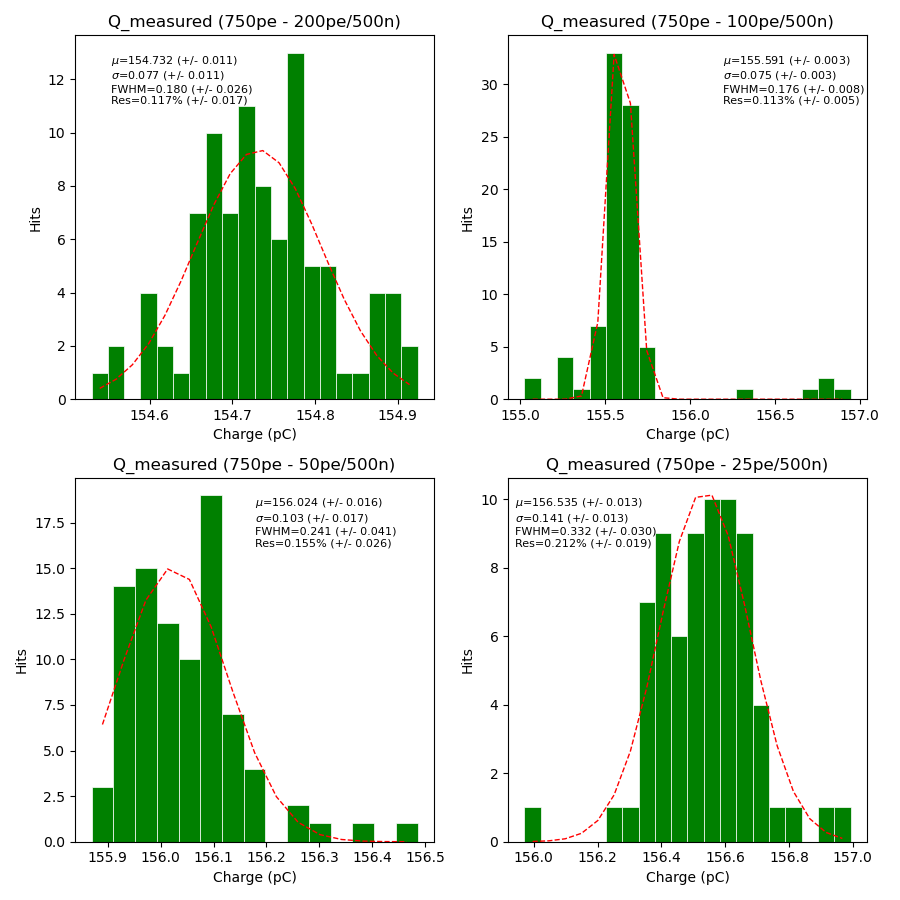

<IPython.core.display.Javascript object>


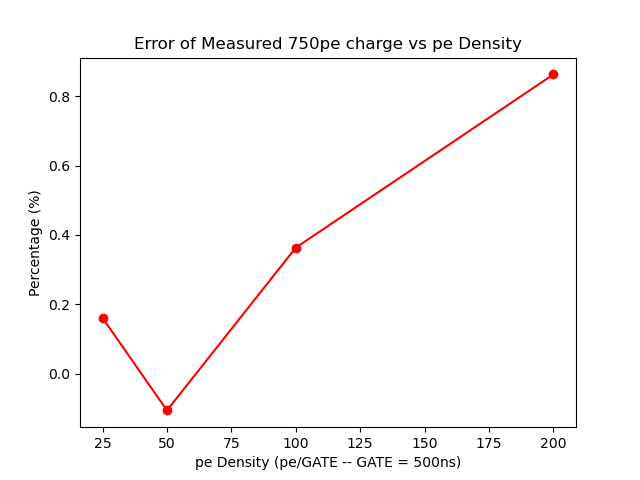

Text(0.5, 1.0, 'Error of Measured 750pe charge vs pe Density')

In [32]:
print("Resolution 25pe = %1.3f%%" % (res_25))
print("Accuracy 25pe = %1.3f (%1.3f%%)" % (acc_abs_25,acc_rel_25))
print("Number of flips (mean) = ", nflips_25)
print("\n")
print("Resolution 50pe = %1.3f%%" % (res_50))
print("Accuracy 50pe = %1.3f (%1.3f%%)" % (acc_abs_50,acc_rel_50))
print("Number of flips (mean) = ", nflips_50)
print("\n")
print("Resolution 100pe = %1.3f%%" % (res_100))
print("Accuracy 100pe = %1.3f (%1.3f%%)" % (acc_abs_100,acc_rel_100))
print("Number of flips (mean) = ", nflips_100)
print("\n")
print("Resolution 200pe = %1.3f%%" % (res_200))
print("Accuracy 200pe = %1.3f (%1.3f%%)" % (acc_abs_200,acc_rel_200))
print("Number of flips (mean) = ", nflips_200)

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))


A_200 = df_200pe[(df_200pe['Q_measured']>154) & (df_200pe['Q_measured']<155)]['Q_measured'] 
A_100 = df_100pe[(df_100pe['Q_measured']>155) & (df_100pe['Q_measured']<157)]['Q_measured'] 
A_50 = df_50pe[(df_50pe['Q_measured']>152) & (df_50pe['Q_measured']<156.5)]['Q_measured'] 
A_25 = df_25pe[(df_25pe['Q_measured']>155) & (df_25pe['Q_measured']<157)]['Q_measured']

fit_pe(A_200,20)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (750pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(A_100,20)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (750pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.6,0.95,"left"])
fit_pe(A_50,15)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (750pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.5,0.95,"left"])
fit_pe(A_25,20)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (750pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.02,0.95,"left"])

fig.tight_layout()

measured_charge = [np.mean(df_25pe['Q_measured']),np.mean(df_50pe['Q_measured']),
                   np.mean(df_100pe['Q_measured']),np.mean(df_200pe['Q_measured'])]
pe_dens = [25, 50 , 100, 200]

plt.figure()
plt.plot(pe_dens,[acc_rel_25,acc_rel_50,acc_rel_100,acc_rel_200],'ro-')
plt.xlabel("pe Density (pe/GATE -- GATE = 500ns)")
plt.ylabel("Percentage (%)")
plt.title("Error of Measured 750pe charge vs pe Density")
